# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for raw data (images)</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

The next cell will install all the required dependencies on your computer. You should consider replacing pip with pip3 if pip is related to python2.7 on your computer, or comment it if you already have the dependencies/are running in the docker of the challenge (runnable with the name areal/codalab:pytorch if you know how to run a docker).

In [1]:
!pip install --user -r requirements.txt

In [1]:
import numpy as np
import random
import re

In [2]:
model_dir = "sample_code_submission"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [4]:
data_dir = '/home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128'
data_name = 'Areal'

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
Files being big, your computer needs to have enough space available in your RAM. It should take about 3-4GB while loading and 1.5GB in the end.

In [6]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading fulldata_autoML_128x128/Areal_train from AutoML format
Number of examples = 5200
Number of features = 49152
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [8]:
# print(data.head(1))
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_128_126_R,pixel_128_126_G,pixel_128_126_B,pixel_128_127_R,pixel_128_127_G,pixel_128_127_B,pixel_128_128_R,pixel_128_128_G,pixel_128_128_B,target
0,80,100,161,80,100,161,80,100,161,80,...,161,165,128,145,150,110,159,166,125,island
1,233,168,138,227,162,130,221,156,124,220,...,203,145,99,203,145,99,203,145,99,desert
2,31,55,93,31,55,93,31,55,93,31,...,75,91,151,75,91,151,76,92,152,island
3,100,107,91,101,108,92,93,100,84,91,...,138,132,116,128,121,105,125,118,102,cloud
4,226,170,135,231,175,140,235,181,145,236,...,231,192,153,233,194,155,232,193,154,desert


In [9]:
data.describe()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_128_125_B,pixel_128_126_R,pixel_128_126_G,pixel_128_126_B,pixel_128_127_R,pixel_128_127_G,pixel_128_127_B,pixel_128_128_R,pixel_128_128_G,pixel_128_128_B
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,96.630769,102.030769,93.676923,97.230769,102.661538,94.323077,94.353846,99.584615,91.230769,93.076923,...,98.015385,99.307692,103.800000,94.523077,97.369231,101.738462,93.076923,95.800000,100.323077,91.600000
std,63.041794,52.057051,52.828765,64.983356,53.971427,54.017679,63.980815,53.380091,53.738594,64.282168,...,58.560463,63.085241,54.084194,55.020765,60.896575,50.817467,51.335389,55.726509,43.865956,43.464713
min,13.000000,14.000000,14.000000,6.000000,13.000000,12.000000,9.000000,13.000000,11.000000,11.000000,...,12.000000,10.000000,15.000000,9.000000,14.000000,19.000000,14.000000,17.000000,22.000000,18.000000
25%,53.000000,63.000000,52.000000,44.000000,64.000000,49.000000,46.000000,60.000000,48.000000,45.000000,...,60.000000,55.000000,63.000000,58.000000,53.000000,60.000000,56.000000,53.000000,64.000000,55.000000
50%,82.000000,88.000000,85.000000,80.000000,96.000000,88.000000,74.000000,87.000000,84.000000,77.000000,...,90.000000,73.000000,90.000000,74.000000,74.000000,97.000000,86.000000,76.000000,96.000000,92.000000
75%,141.000000,137.000000,135.000000,139.000000,145.000000,136.000000,136.000000,140.000000,136.000000,136.000000,...,121.000000,152.000000,141.000000,128.000000,138.000000,144.000000,130.000000,135.000000,137.000000,132.000000
max,239.000000,240.000000,245.000000,237.000000,239.000000,242.000000,239.000000,238.000000,243.000000,240.000000,...,255.000000,240.000000,249.000000,254.000000,235.000000,245.000000,254.000000,232.000000,212.000000,218.000000


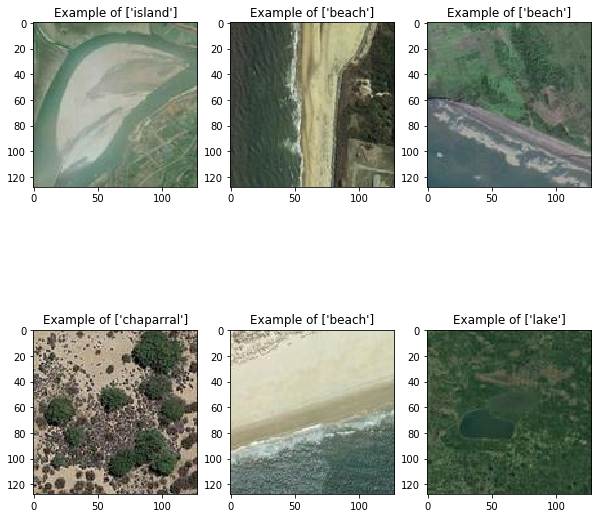

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(128,128,3)
    label = data.iloc[i].values[-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [10]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

       target
0      island
1      desert
2      island
3       cloud
4      desert
5         sea
6      meadow
7      forest
8      meadow
9   chaparral
10     island
11       lake
12      river
13        sea
14  chaparral
15  chaparral
16        sea
17     forest
18      cloud
19      river
20     meadow
21       lake
22   snowberg
23     island
24      river
25    wetland
26      cloud
27      cloud
28   snowberg
29     island
..        ...
35  chaparral
36     forest
37  chaparral
38   mountain
39    wetland
40        sea
41      beach
42      river
43     desert
44       lake
45       lake
46    wetland
47      river
48     meadow
49   mountain
50   mountain
51     desert
52       lake
53   snowberg
54     forest
55      beach
56      cloud
57      beach
58      beach
59     desert
60   mountain
61     forest
62        sea
63      beach
64   mountain

[65 rows x 1 columns]


# Step 2 : Building a predictive model

<h2 style="color:red " >Warning</h2>

<p style="font-style:italic"> In case you want to load the full data </p> 
This time, also, still make sure that your RAM has at least 2-3GB available.

In [5]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=False, verbose=True)
print(D)

Info file NOT found : /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128/Areal_public.info
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128/Areal_feat.type
[+] Success in  0.00 sec
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128/Areal_train.data
[+] Success in 64.29 sec
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128/Areal_train.solution
[+] Success in  0.01 sec
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128/Areal_valid.data
[+] Success in 22.82 sec
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata_autoML_128x128/Areal_valid.solution
[+] Success in  0.00 sec
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/128x128/starting_kit/fulldata

In [7]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

### Use of the baseline model

Using our BasicCNN model needs some specific libraries, so if you encounter unknown module errors, you probably lack one of them. Go up and run the cell below requirements.

In case you have them but still encounter errors related to them, you should probably do an upgrade : 

    pip install -U torch  /   pip install -U torchvision

In [7]:
from model import BasicCNN

In [8]:
m = BasicCNN(verbose=True)
trained_model_name = model_dir + data_name

In [9]:
m.fit(X_train, Y_train)

Epoch 0 : loss = 2.462690
Epoch 1 : loss = 2.391321
Epoch 2 : loss = 2.358323
Epoch 3 : loss = 2.337787
Epoch 4 : loss = 2.322290
Epoch 5 : loss = 2.310506
Epoch 6 : loss = 2.301488
Epoch 7 : loss = 2.294411
Epoch 8 : loss = 2.288719
Epoch 9 : loss = 2.284044


In [10]:
Y_hat_train = m.predict(D.data['X_train'])
Y_hat_valid = m.predict(D.data['X_valid'])
Y_hat_test = m.predict(D.data['X_test'])

In [11]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring the result

Obviously, since it is made with sample_data, which has too few samples, results won't be really good

In [12]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [13]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy metric = 0.4585
Ideal score for the accuracy metric = 1.0000


## confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[  0,  64,   0,  25,  55,  62,  24,  12,   0,   0, 103,  55,   0],
       [  0, 378,   0,  19,   2,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,  54,   0,   5,  13,  39,  20,   1,   0,   0, 185,  83,   0],
       [  0,  38,   0, 352,   2,   0,   0,   2,   0,   0,   4,   2,   0],
       [  0,  75,   0,   7, 268,   0,  11,  36,   0,   0,   1,   2,   0],
       [  0,   6,   0,   0,   9, 317,  24,  10,   0,   0,  28,   6,   0],
       [  0,  49,   0,   1,  61,  10, 238,  20,   0,   0,  13,   8,   0],
       [  0,   2,   0,   2,  18,   0,   3, 375,   0,   0,   0,   0,   0],
       [  0, 172,   0,  33, 104,   2,  36,  38,   0,   0,   7,   8,   0],
       [  0,  39,   0,   5, 182,   6,  79,  40,   0,   0,  46,   3,   0],
       [  0,   0,   0,   0,   5,  29,   3,   0,   0,   0, 358,   5,   0],
       [  0,  47,   0,   0,  17,   1,   3,   0,   0,   0, 234,  98,   0],
       [  0, 120,   0,   3, 148,   2,  42,  69,   0,   0,  14,   2,   0]])

## cross validation

In [15]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [16]:
scores = cross_val_score(BasicCNN(), X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.44 (+/- 0.03)


## T-SNE

In [6]:
from sklearn.manifold import TSNE

In [8]:
label_dict = {
    0: "beach",
1: "chaparral",
2: "cloud",
3: "desert",
4: "forest",
5: "island",
6: "lake",
7: "meadow",
8: "mountain",
9: "river",
10: "sea_ice",
11: "snowberg",
12: "wetland"}

In [9]:
tsne = TSNE(n_components=2)

In [10]:
out_tsne = tsne.fit_transform(X_train)

In [11]:
print(out_tsne.shape)

(5200, 2)


In [12]:
import matplotlib.pyplot as plt

In [13]:
# https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

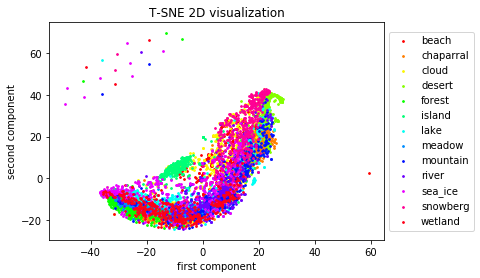

In [14]:
cmap = get_cmap(13)
for i in range(13):
    tmp = Y_train.reshape(-1)==i
    plt.scatter(out_tsne[tmp, 0], out_tsne[tmp, 1], label=label_dict[i], c=cmap(i), s=3)
plt.title("T-SNE 2D visualization")
plt.xlabel("first component")
plt.ylabel("second component")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

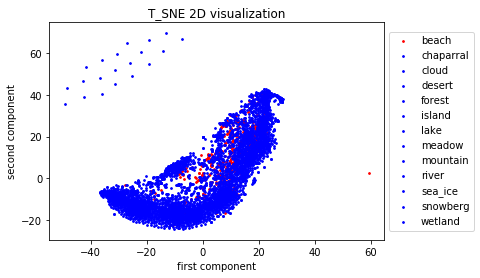

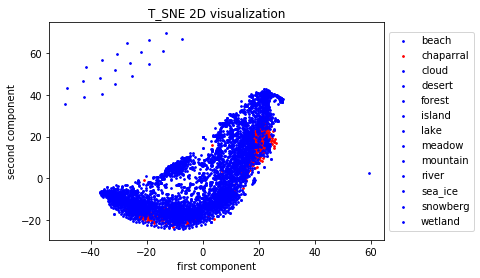

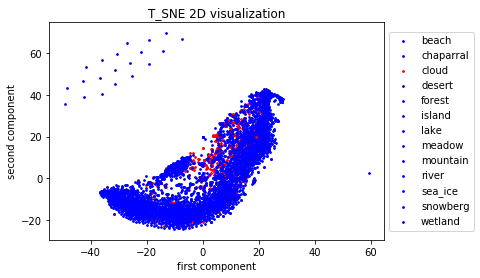

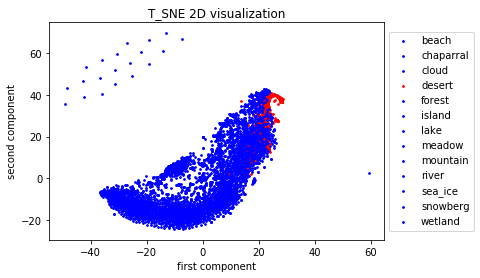

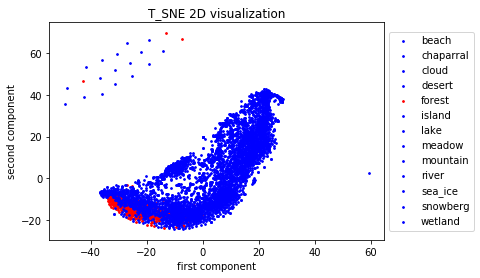

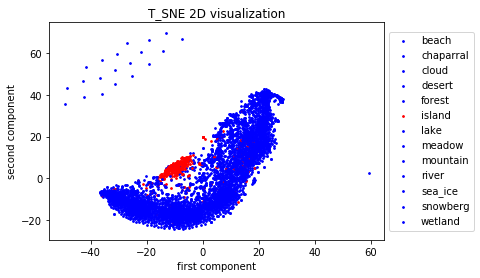

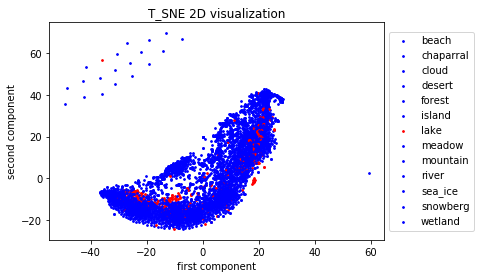

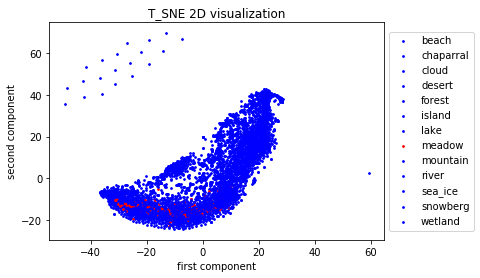

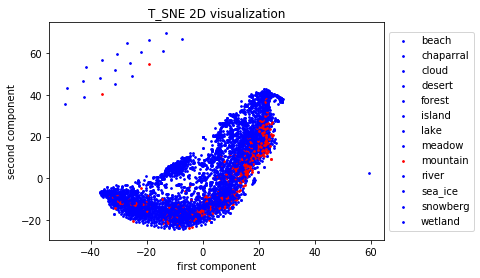

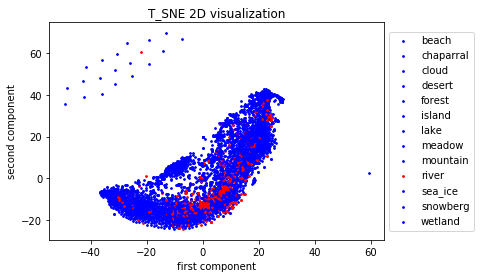

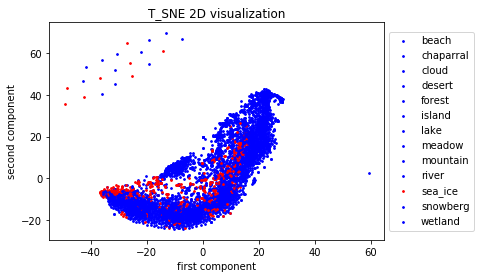

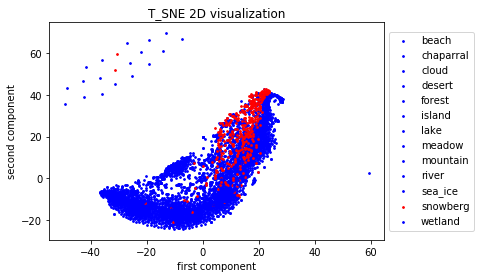

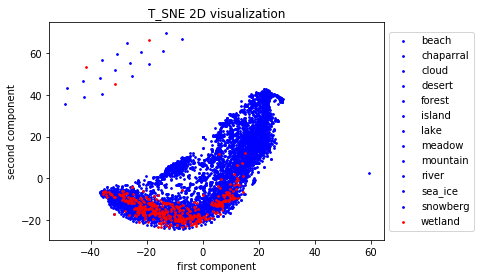

In [15]:
colors = {True: 'r', False: 'b'}
for classe in range(13):  
    for i in range(13):
        tmp = Y_train.reshape(-1)==i
        plt.scatter(out_tsne[tmp, 0], out_tsne[tmp, 1], label=label_dict[i], c=colors[classe == i], s=3)
    plt.title("T_SNE 2D visualization")
    plt.xlabel("first component")
    plt.ylabel("second component")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [17]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/samuel/Documents/Cours/M2_AIC/Mini-projet/Remote-Sensing-Image/starting_kit/128x128_autoML
Using output_dir: /home/samuel/Documents/Cours/M2_AIC/Mini-projet/Remote-Sensing-Image/starting_kit/sample_result_submission
Using program_dir: /home/samuel/Documents/Cours/M2_AIC/Mini-projet/Remote-Sensing-Image/starting_kit/ingestion_program
Using submission_dir: /home/samuel/Documents/Cours/M2_AIC/Mini-projet/Remote-Sensing-Image/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Areal ********
************************************************
========= Reading and converting data ==========
Info file found : /home/samuel/Documents/Cours/M2_AIC/Mini-projet/Remote-Sensing-Image/starting_kit/128x128_autoML/Areal_public.info
========= Reading /home/samuel/Documents/Cours/M2_AIC/Mini-projet/Remote-Sensing-Image/starting_kit/128x128_autoML/Areal_feat.type
[+] Succe

### Test scoring program

In [20]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_test): accuracy(set1_score)=0.081538461538 =======
======= Set 2 (Areal_train): accuracy(set2_score)=0.089807692308 =======
======= Set 3 (Areal_valid): accuracy(set3_score)=0.091282051282 =======


# Prepare the submission

In [21]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_18-12-14-14-07.zip
../sample_result_submission_18-12-14-14-07.zip
